In [1]:
# importing of all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the csv files 
x_test=pd.read_csv('test_x.csv')
x_train=pd.read_csv('train_x.csv')
y_train=pd.read_csv("train_y.csv")


In [3]:
# to check whether missing values are present in the dataset 
# from count row of below described data of xtrain we find all the columns except "ID" have missing values
x_train.describe()

,ID,Expense,Income,Age,Score1,Score2,Score3,Score4,Score5
count,80000.000000,77956.000000,78045.000000,77986.000000,78060.000000,77964.000000,78045.000000,78028.000000,78002.000000
mean,40000.500000,1733.993769,15641.112448,0.441105,0.187617,192.065584,9.365450,600.397742,3417.740403
std,23094.155105,133.239147,1065.620737,0.496522,0.123509,28.558250,8.760134,3.826112,64.391844
min,1.000000,1126.809192,11171.703240,0.000000,-0.563328,40.572797,-28.885235,581.806404,3124.413430
25%,20000.750000,1644.263974,14925.658150,0.000000,0.112651,173.415940,3.514901,597.894759,3374.406833
50%,40000.500000,1736.276720,15624.259290,0.000000,0.189877,191.056193,8.883862,600.095436,3418.793524
75%,60000.250000,1824.376793,16346.084990,1.000000,0.265243,209.727593,14.746607,602.597131,3461.384283
max,80000.000000,2309.129903,20728.915330,1.000000,0.705737,338.073551,50.691479,619.623108,3692.731924


In [4]:
y_train.describe()
# OUT OF 80000 VALUES "LABEL" COLUMN CONSISTS OF ONLY 76097 . WE CONCLUDE "y_train" HAVE MISSING DATA 

,ID,Label
count,80000.000000,76097.000000
mean,40000.500000,0.066139
std,23094.155105,0.248527
min,1.000000,0.000000
25%,20000.750000,0.000000
50%,40000.500000,0.000000
75%,60000.250000,0.000000
max,80000.000000,1.000000


<AxesSubplot:>

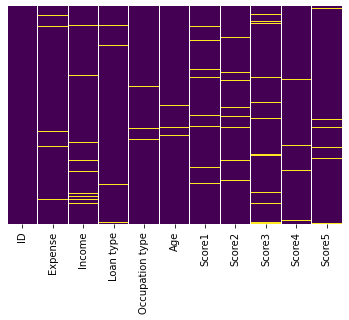

In [5]:
# from the below plot the horizontal lines(yellow) indicates that some data is missing in x_train
sns.heatmap(x_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# HANDLING THE MISSING DATA

In [6]:
# all the missing values except the categorical columns (i.e ["Loan type","Occupation type","Age"]) are replaced with there "mean" value
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer=imputer.fit(x_train[['Expense', 'Income','Score1', 'Score2', 'Score3', 'Score4', 'Score5']])
x_train[['Expense', 'Income','Score1', 'Score2', 'Score3', 'Score4', 'Score5']]=imputer.transform(x_train[['Expense', 'Income','Score1', 'Score2', 'Score3', 'Score4', 'Score5']])

<AxesSubplot:>

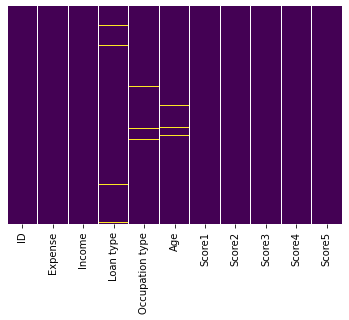

In [7]:
sns.heatmap(x_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# from the below diagram we observe that only categorical columns (i.e ["Loan type","Occupation type","Age"]) have missing data

In [8]:
# handling the missing values of categorical columns 
# replacing the values with "most_frequently occured" value of the specific column
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer=imputer.fit(x_train[["Loan type","Occupation type","Age"]])
x_train[["Loan type","Occupation type","Age"]]=imputer.transform(x_train[["Loan type","Occupation type","Age"]])


In [9]:
# handling the missing values of y_train
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer=imputer.fit(y_train[["Label"]])
y_train[["Label"]]=imputer.transform(y_train[["Label"]])

<AxesSubplot:>

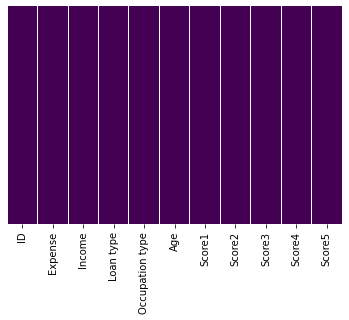

In [10]:
sns.heatmap(x_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# from the below diagram we conclude all the missing values are handled 

# ENCODING THE CATEGORICAL DATA

In [11]:
# ENCODING THE "LOAN TYPE" COLUMN ( i.e 1---->B, 0--->A)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x_train["Loan type"]=le.fit_transform(x_train["Loan type"])

In [12]:
x_train.head()
# we conclude the "Loan type" column data has encoded (i.e  B as 1, A as 0 )

,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,1830.943788,14767.28013,1,Y,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,2,1645.302546,15272.26775,1,Y,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,3,1555.026392,17482.49734,0,Y,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,4,1733.993769,16257.66493,0,Y,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,5,1777.648916,16316.29914,1,X,1.0,0.187617,224.074728,11.218489,605.947340,3438.864083


In [13]:
# "occupation type" column having three categories so we cant handle this as we handled in"Loan type"
# column . here we try to skip any one category . if remaining two categories are (0,0) then that represents skiped category
# i.e get_dummies does this for us
xtrain=pd.get_dummies(x_train["Occupation type"],drop_first=True)
xtrain.head()
# we conclude here X category is removed and first row having (1,0) belongs to Y category
# and fourth row having (0,0) belongs to X category

,Y,Z
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


In [14]:
# we have replaced the Occupation type column with the two categories i.e(Y,Z)
x_train=pd.concat([xtrain,x_train],axis=1)
x_train.drop("Occupation type",axis=1,inplace=True)
x_train.head()

,Y,Z,ID,Expense,Income,Loan type,Age,Score1,Score2,Score3,Score4,Score5
0,1,0,1,1830.943788,14767.28013,1,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,1,0,2,1645.302546,15272.26775,1,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,1,0,3,1555.026392,17482.49734,0,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,1,0,4,1733.993769,16257.66493,0,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,0,0,5,1777.648916,16316.29914,1,1.0,0.187617,224.074728,11.218489,605.947340,3438.864083


In [15]:
# all the data have preprocessed and we have stored all the given trained data in x and y..
# we can use this x and y data for training and testing the models
x=x_train[["ID","Expense","Income","Loan type","Y","Z","Age","Score1","Score2","Score3","Score4","Score5"]]
y=y_train[["Label"]]

In [16]:
# split the data into train set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
# here all the data have been split into 80% training_set and 20% for testing the model

In [17]:
#feature scaling the data for better accuracy
#normalisation here using the gaussian distribution
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## FITTING THE DATA TO ALL CLASSIFICATION MODELS 

##### LOGISTIC REGRESSION

In [18]:
# fitting the logistic regression to the trainig set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver="lbfgs")
classifier.fit(x_train,y_train)


LogisticRegression()

In [19]:
# predicting the test set results
y_predict=classifier.predict(x_test)
print(y_predict)

[0. 0. 0. ... 0. 0. 0.]


In [20]:
# FINDING THE ACCURACY OF THE MODEL
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14908    79]
 [  574   439]]

Accuracy: 95.92


##### KNEIGHBORS CLASSIFICATION

In [21]:
# fitting the KNeighborsClassifier to training data
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
# predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
# FINDING THE ACCURACY OF THE MODEL
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14904    83]
 [  255   758]]

Accuracy: 97.89


#### SUPPORT VECTOR CLASSIFICATION (SVC)

In [24]:
# fitting the svc trainig data
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

In [25]:
# predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [26]:
# FINDING THE ACCURACY OF THE MODEL
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14925    62]
 [  282   731]]

Accuracy: 97.85


#### DECISION TREE CLASSIFICATION

In [27]:
# fitting the decision tress classifier to data
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion="gini",random_state=0)  
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
# predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
# FINDING THE ACCURACY OF THE MODEL
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14761   226]
 [  255   758]]

Accuracy: 96.99


#### RANDOM FOREST CLASSIFICATION

In [30]:
# fitting the random forest clasifier to the data
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=10,criterion="gini",random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [31]:
# predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [32]:
# FINDING THE ACCURACY OF THE MODEL
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14913    74]
 [  270   743]]

Accuracy: 97.85


#### NAIVE BAYES CLASSIFICATION

In [33]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [34]:
# predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [35]:
# FINDING THE ACCURACY OF THE MODEL
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14923    64]
 [  573   440]]

Accuracy: 96.02


## Conclusions on the above models :
Random Forest Classifier, Support Vector Classifier and KNeighbors Classifier provide better accuracy compared to all other classification models ..
KNeighbors Classifier is the best classifier for the given data

### FEATURES SELECTION

##### Univariate Selection

In [36]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X=x[["ID","Expense","Income","Loan type","Y","Z","Age","Score1","Score2","Score3","Score4","Score5"]]
Y=y[["Label"]]

In [37]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=6)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [38]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Species','Scores'] 
print(featureScores)

      Species       Scores
0          ID     2.722196
1     Expense  2908.387304
2      Income  3719.147002
3   Loan type   665.945897
4           Y     3.241562
5           Z   294.229013
6         Age   393.509012
7      Score1  1469.917741
8      Score2   525.729914
9      Score3   263.827763
10     Score4   753.029506
11     Score5  2889.807629


#### Feature Importance

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

[0.03868263 0.13080591 0.14754158 0.0287686  0.01549409 0.04300335
 0.02181581 0.15483734 0.06433975 0.13485762 0.09136266 0.12849068]


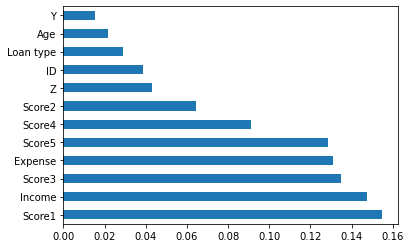

In [40]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

#### Correlation Matrix With Heatmap

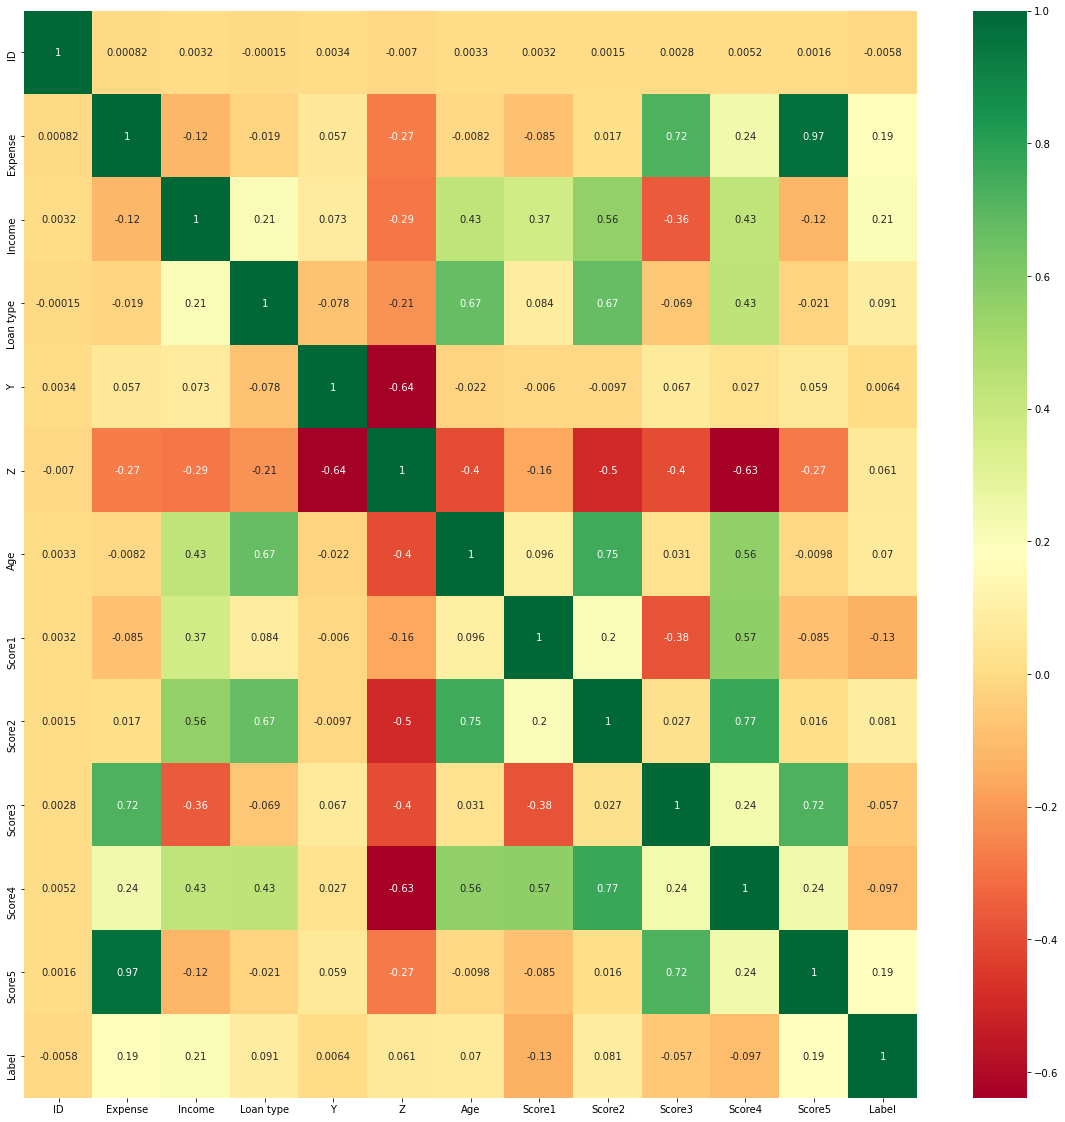

In [41]:
data=pd.concat([X,Y],axis=1)
import seaborn as sns
#get correlations of each features in dataset
cor_mat = data.corr()
top_corr_features = cor_mat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

##  Checking The Accuracy After Feature Selection

In [42]:
featured_X=X[["Income","Expense","Score1","Score2","Loan type","Score4","Score5","Score3"]]
featured_Y=Y[["Label"]]

In [43]:
# split the data into train set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(featured_X,featured_Y,test_size=0.20,random_state=0)


In [44]:
#feature scaling the data
# normalisation here using the gaussian distribution
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


#### KNEIGHBORS CLASSIFIER

In [45]:
# fitting the KNeighborsClassifier to training data
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
# predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
# FINDING THE ACCURACY OF THE MODEL
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14903    84]
 [  204   809]]

Accuracy: 98.20


### Support Vector Classifier

In [48]:
# fitting the svc trainig data
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

In [49]:
# predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
# FINDING THE ACCURACY OF THE MODEL
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14922    65]
 [  258   755]]

Accuracy: 97.98


### Random Forest Classifier

In [51]:
# fitting the random forest clasifier to the data
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=10,criterion="gini",random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [52]:
# predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
# FINDING THE ACCURACY OF THE MODEL
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14910    77]
 [  237   776]]

Accuracy: 98.04


## Conclusions on Feature Selection:
From the above reports of three feature selection methods we conclude that "Age,"Occupation type" and "ID" features has no significant effect on the output.

The accuracy obtained while skipping these features from the data is higher..

KNeighbors Classifier gives the best accuracy amongst all the classification models..So we use this model for our predictions on the test_x..

## Predictions on the "test_x"

In [54]:
# importing the test dataset
import pandas as pd
data=pd.read_csv("test_x.csv")
train_x=X[:]
train_y=Y[:]

In [55]:
# encoding the categorical test data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Loan type"]=le.fit_transform(data["Loan type"])


In [56]:
# "occupation type" column having three categories so we cant handle this as we handled in"Loan type"
# column . here we try to skip any one category . if remaining two categories are (0,0) then that represents skiped category
# i.e get_dummies does this for us
xtest=pd.get_dummies(data["Occupation type"],drop_first=True)
# we have replaced the Occupation type column with the two categories i.e(Y,Z)
x_test=pd.concat([xtest,data],axis=1)
x_test.drop("Occupation type",axis=1,inplace=True)
test_x=x_test[["ID_Test","Expense","Income","Loan type","Y","Z","Age","Score1","Score2","Score3","Score4","Score5"]]


In [57]:
# fitting the KNeighborsClassifier to training data
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(train_x,train_y)

KNeighborsClassifier()

In [58]:
# predicting the test set results
pred_y=classifier.predict(test_x)
pred_y

array([0., 0., 0., ..., 1., 0., 0.])

In [59]:
# converting the test_y into csv file
id=np.arange(1,20001)
pred_y=pd.DataFrame(pred_y,columns=["Label"])
df=pd.DataFrame(id,columns=["ID"])
df1=pd.concat([df,pred_y],axis=1)
export_csv=df1.to_csv("C:\\Users\\HP\\Desktop\\Documents\\PROJECT MS4610\\pred_y.csv",index=False,header=True)  # here we didnt export the index so the indexes are changed to default indexes
print(df1)

          ID  Label
0          1    0.0
1          2    0.0
2          3    0.0
3          4    0.0
4          5    0.0
...      ...    ...
19995  19996    0.0
19996  19997    0.0
19997  19998    1.0
19998  19999    0.0
19999  20000    0.0

[20000 rows x 2 columns]
